In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:11<00:00, 80.7MB/s]
100% 1.06G/1.06G [00:11<00:00, 99.1MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [13]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [15]:
# Normalize (0, 255) --> (0, 1)

def process(image, label):
    image = tf.cast(image/255. , tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [25]:
# create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))



In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [28]:
model.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(train_ds, epochs = 10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 108ms/step - loss: 1.6920 - accuracy: 0.6047 - val_loss: 0.6090 - val_accuracy: 0.6664
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5661 - accuracy: 0.7074 - val_loss: 0.9319 - val_accuracy: 0.7032
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4747 - accuracy: 0.7769 - val_loss: 0.4622 - val_accuracy: 0.7848
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4142 - accuracy: 0.8114 - val_loss: 0.7407 - val_accuracy: 0.6088
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3706 - accuracy: 0.8370 - val_loss: 0.4807 - val_accuracy: 0.7952
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2901 - accuracy: 0.8777 - val_loss: 1.0441 - val_accuracy: 0.6742
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2093 - accuracy: 0.9154 - val_loss: 0.7565 - val_ac

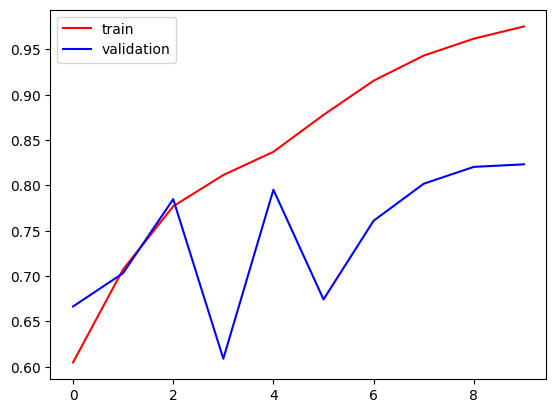

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

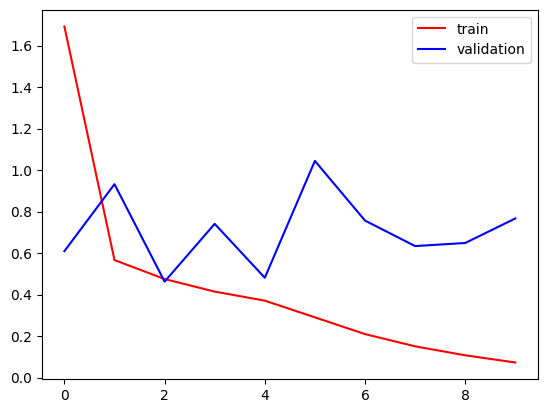

In [31]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [32]:
#ways to reduce overfitting

# Add more data
# Data Augmentation
# L1/L2 Regularization
# Dropout
# Batch Norm
# Reduce complexity

In [33]:
  import cv2

In [34]:
test_img = cv2.imread('/content/cat.jpg')

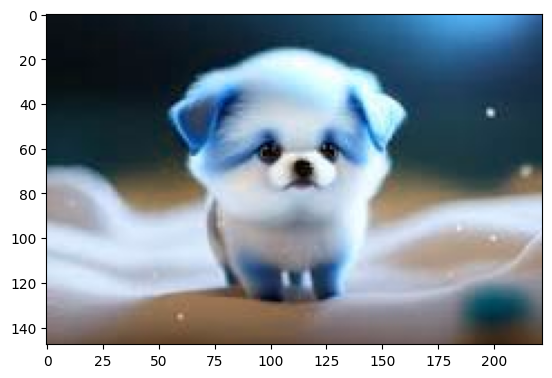

In [36]:
plt.imshow(test_img)

In [37]:
test_img.shape

(148, 222, 3)

In [38]:
test_img =cv2.resize(test_img, (256, 256))

In [39]:
test_input = test_img.reshape((1, 256, 256, 3))

In [40]:
model.predict(test_input)
#1 --> dog

1/1 [==============================] - 0s 385ms/step


array([[1.]], dtype=float32)